# Final Project Group 7

# Authors: Leroy Musa, Chan Woo Hwang, Gordon Hamilton, Joaquin Philco

**Original Dataset Source: House Prices 2023 Dataset. gigasheet. https://www.gigasheet.com/sample-data/house-prices-2023-dataset**


**Modified Dataset: Student Performance https://raw.githubusercontent.com/leroymusa/EECS3401-Final-Project/main/house_prices.csv**

# Acquiring Dataset

In [164]:
# Import libraries
# you can install missing library using pip install numpy 
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)


# Download the dataset
url = "https://raw.githubusercontent.com/leroymusa/EECS3401-Final-Project/main/house_prices.csv"
housing_prices = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
housing_backup = housing_prices

In [124]:
#Show the first 5 values of the dataset before dropping and cleaning it

housing_prices.head() 
#housing_prices.info()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [165]:

#Cleaning Data

housing_prices = housing_prices.drop('Unnamed: 0', axis=1)
housing_prices.isna().sum() #checks for missing values and returns the individual sum of these ones for each

#Checking for zero values in the data set
print("Number of zeros in the price column:", (housing_prices['price'] == 0).sum())
print("Number of zeros in the baths column:", (housing_prices['baths'] == 0).sum())
print("Number of zeros in the bedrooms column:", (housing_prices['bedrooms'] == 0).sum())
print("Number of zeros in the Area in Marla column:", (housing_prices['Area_in_Marla'] == 0.0).sum())

#show the columns with zeros
zero_rows = housing_prices[housing_prices['bedrooms'] == 0]
print(zero_rows)
zero_rows = housing_prices[housing_prices['Area_in_Marla'] == 0]
print(zero_rows)

#We cannot keep values that have zeros as bedrooms or Area as having a house with 0 bedrooms and 0.0 area does not make sense.
housing_prices = housing_prices[housing_prices['bedrooms'] != 0]
housing_prices = housing_prices[housing_prices['Area_in_Marla'] != 0]

#Double check for zeros again
print("Number of zeros in the price column:", (housing_prices['price'] == 0).sum())
print("Number of zeros in the baths column:", (housing_prices['baths'] == 0).sum())
print("Number of zeros in the bedrooms column:", (housing_prices['bedrooms'] == 0).sum())
print("Number of zeros in the Area in Marla column:", (housing_prices['Area_in_Marla'] == 0.0).sum())

Number of zeros in the price column: 0
Number of zeros in the baths column: 0
Number of zeros in the bedrooms column: 294
Number of zeros in the Area in Marla column: 10
      property_type     price                        location        city  \
230            Flat   6000000             Bahria Town Karachi     Karachi   
341            Flat   5049000                       Scheme 33     Karachi   
369            Flat     75000                             I-8   Islamabad   
1042          House   8500000  Gulzar-e-Quaid Housing Society  Rawalpindi   
1430          House  23000000          Bahria Town Rawalpindi  Rawalpindi   
...             ...       ...                             ...         ...   
93977          Flat   1350000                     DHA Defence      Lahore   
96777          Flat   3500000                       Nazimabad     Karachi   
98223          Flat     65000                            F-11   Islamabad   
98487          Flat   3800000                     Saddar Tow

In [ ]:
#Show the dataset after cleaning data
housing_prices.head() 

In [166]:
def remove_outlier(data) : 
    q1 = data['Area_in_Marla'].quantile(0.25)
    q3 = data['Area_in_Marla'].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR) # Outlier 판단 Lower Bound 계산
    upper_bound = q3 + (1.5 * IQR)  #Outlier 판단 Upper Bound 계산
    
    filtered_data  = data[data['Area_in_Marla'] >= lower_bound]
    filtered_data  = data[data['Area_in_Marla'] <= upper_bound]
    return filtered_data    

In [167]:
housing_prices = remove_outlier(housing_prices)

In [168]:
housing_prices = housing_prices[housing_prices['property_type'] != 'Penthouse']
housing_prices = housing_prices[housing_prices['property_type'] != 'Room']
housing_prices = housing_prices[housing_prices['property_type'] != 'Farm House']
housing_prices = housing_prices[housing_prices['city'] != 'Faisalabad']

# Exploratory Data Analysis of the Dataset


# EDAs for Non-Vumerical Variables

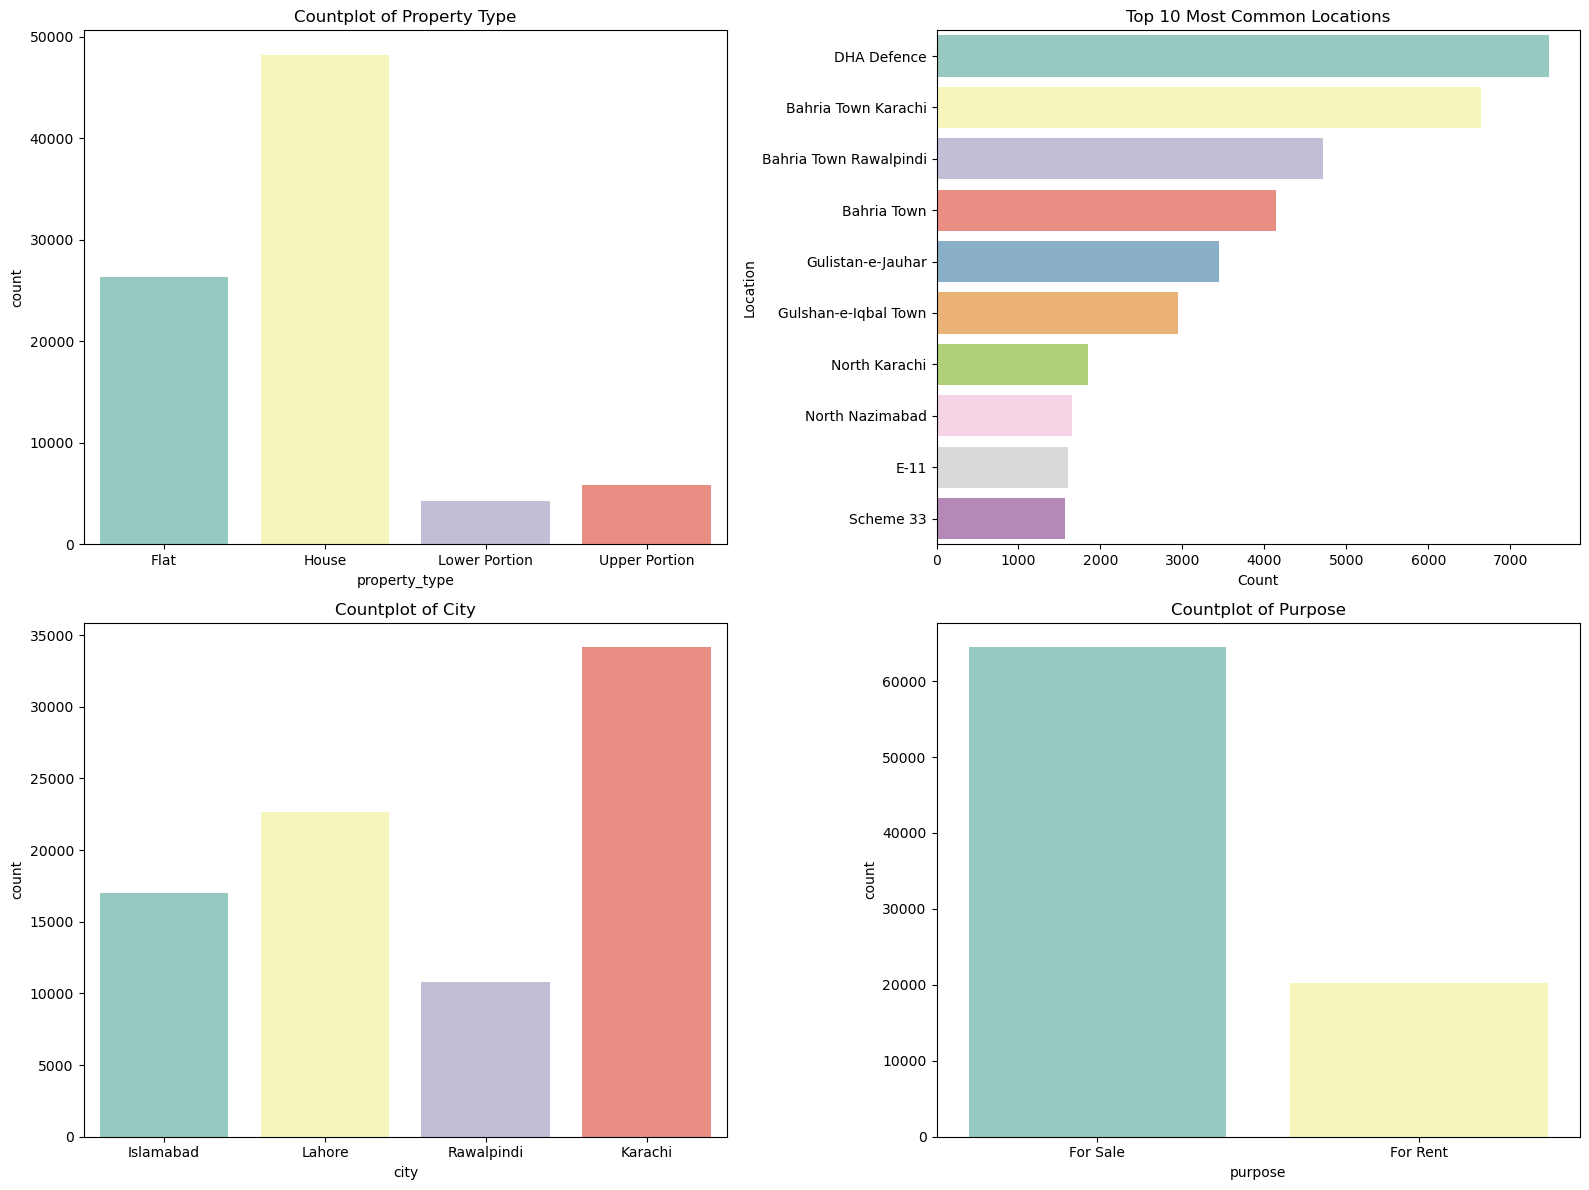

In [136]:
#housing_prices.hist(bins=20, figsize=(24, 16))

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Property Type Count Plot
sns.countplot(x='property_type', data=housing_prices, palette='Set3', ax=axes[0, 0])
axes[0, 0].set_title('Countplot of Property Type')

# Location Count Plot
location_counts = housing_prices['location'].value_counts().head(10)
sns.barplot(x=location_counts.values, y=location_counts.index, palette='Set3', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Most Common Locations')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Location')

# City Count Plot
sns.countplot(x='city', data=housing_prices, palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('Countplot of City')

# Purpose Count Plot
sns.countplot(x='purpose', data=housing_prices, palette='Set3', ax=axes[1, 1])
axes[1, 1].set_title('Countplot of Purpose')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# EDAs for Numerical Variables

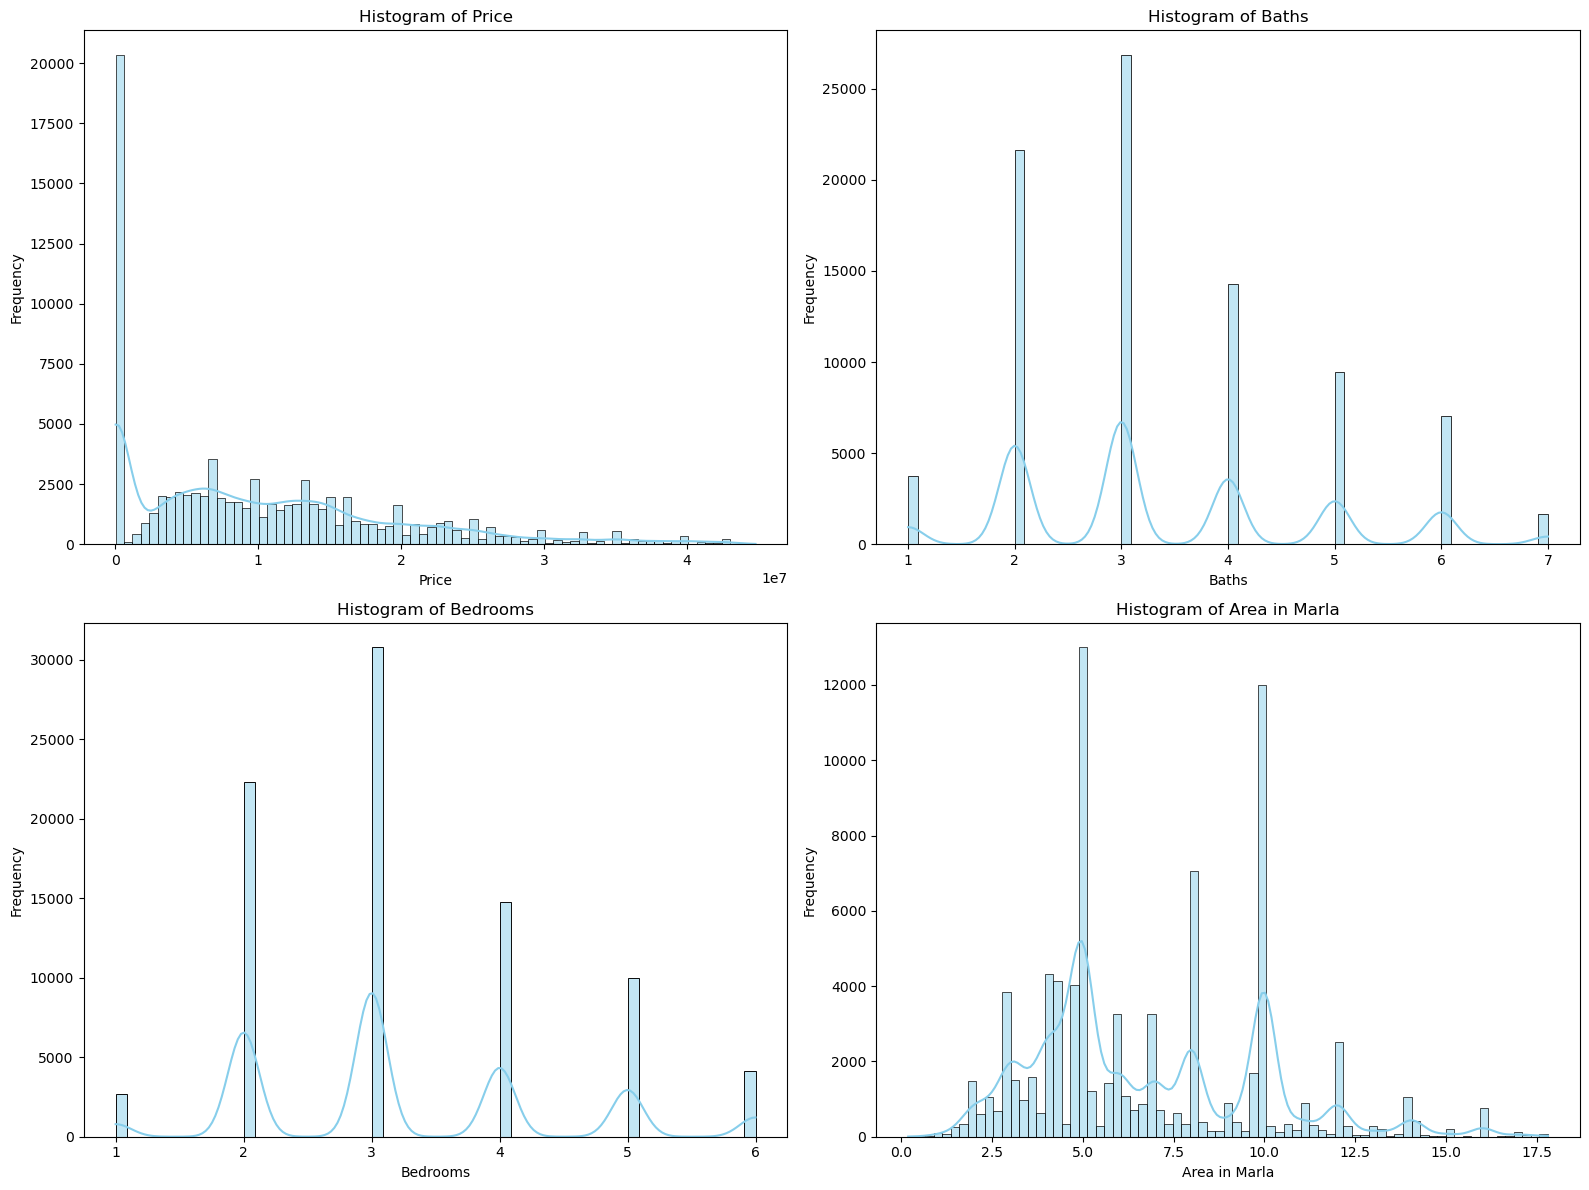

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x800 with 0 Axes>

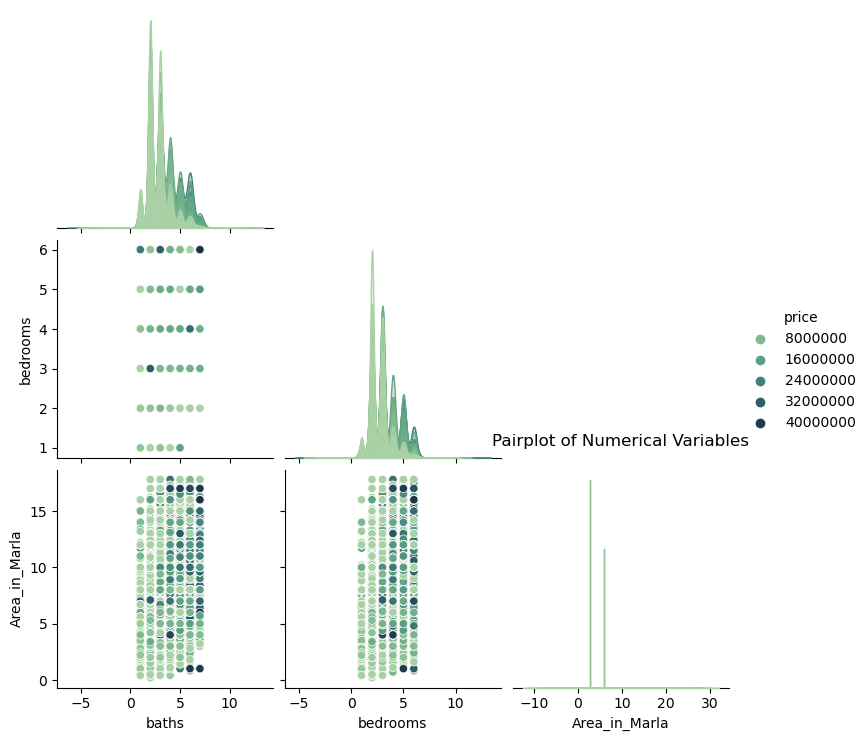

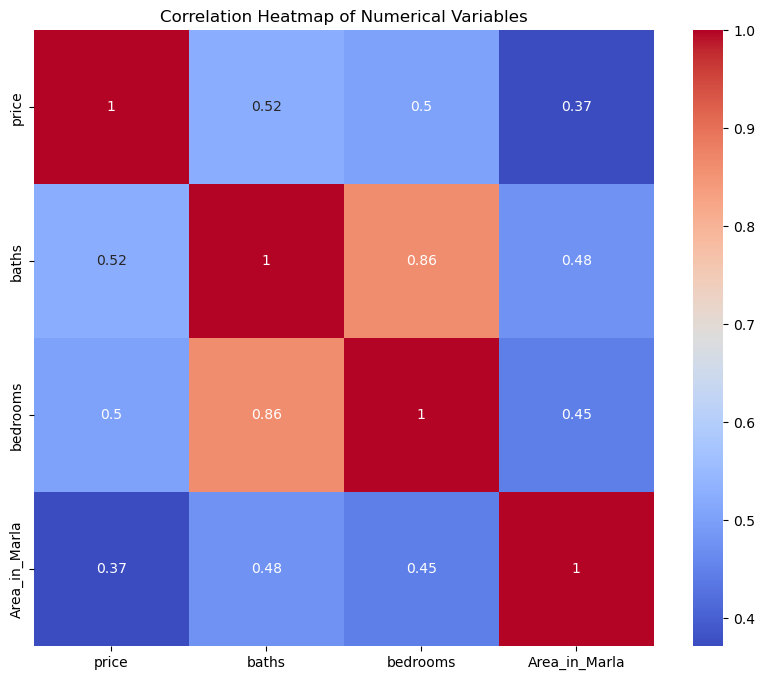

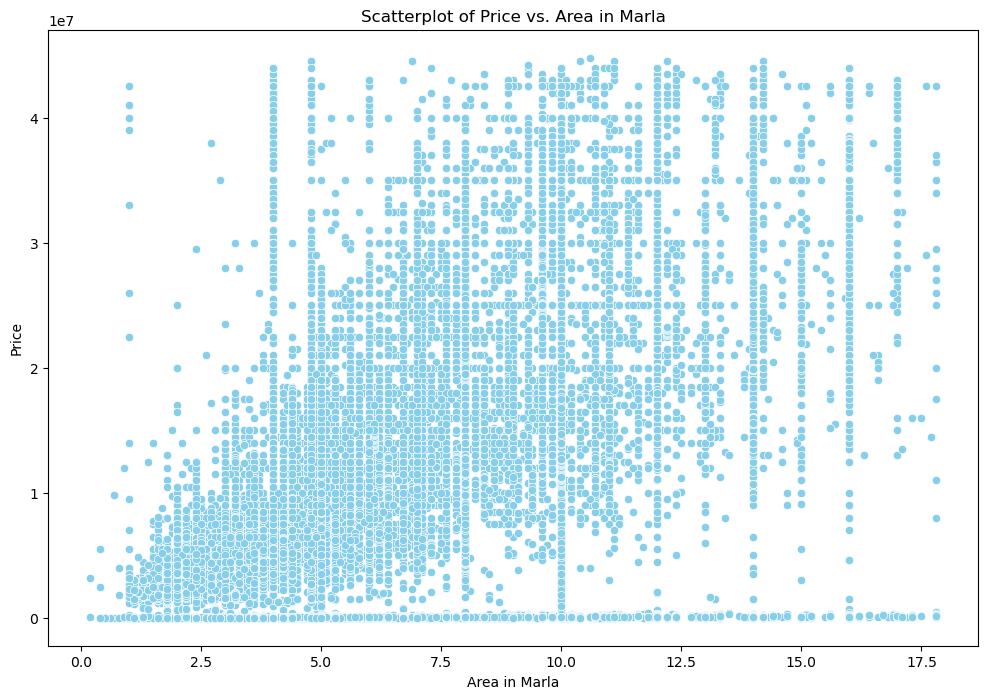

In [137]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram of Price
sns.histplot(data=housing_prices, x='price', kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Price')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

# Histogram of Baths
sns.histplot(data=housing_prices, x='baths', kde=True, color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Baths')
axes[0, 1].set_xlabel('Baths')
axes[0, 1].set_ylabel('Frequency')

# Histogram of Bedrooms
sns.histplot(data=housing_prices, x='bedrooms', kde=True, color='skyblue', ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Bedrooms')
axes[1, 0].set_xlabel('Bedrooms')
axes[1, 0].set_ylabel('Frequency')

# Histogram of Area in Marla
sns.histplot(data=housing_prices, x='Area_in_Marla', kde=True, color='skyblue', ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Area in Marla')
axes[1, 1].set_xlabel('Area in Marla')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Pairplot
plt.figure(figsize=(20, 8))
sns.pairplot(data=housing_prices[['price', 'baths', 'bedrooms', 'Area_in_Marla']], hue="price", corner=True, dropna=True, palette="ch:r=-.5,l=.75")
plt.title('Pairplot of Numerical Variables')
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(housing_prices[['price', 'baths', 'bedrooms', 'Area_in_Marla']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=housing_prices, x='Area_in_Marla', y='price', color='skyblue')
plt.title('Scatterplot of Price vs. Area in Marla')
plt.xlabel('Area in Marla')
plt.ylabel('Price')
plt.show()

# Create a pipeline

In [169]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
housing_prices = housing_prices.drop('location', axis = 1)
num_cols = housing_prices.select_dtypes(include='number').columns.to_list()
cat_cols = housing_prices.select_dtypes(exclude='number').columns.to_list()

num_cols.remove("price")

#create pipelines for numeric and categorical columns

num_pipeline = make_pipeline(SimpleImputer(strategy = 'mean'), StandardScaler())
# sparse output is required or creates an error
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())


#use ColumnTransformer to set the estimators and transformations
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols), ('cat', cat_pipeline, cat_cols)], remainder='passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['baths', 'bedrooms', 'Area_in_Marla']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['property_type', 'city', 'purpose'])])

In [170]:
housing_prepared = preprocessing.fit_transform(housing_prices)

feature_names=preprocessing.get_feature_names_out()
housing_prepared = pd.DataFrame(housing_prepared, columns=feature_names)

housing_prepared


,num__baths,num__bedrooms,num__Area_in_Marla,cat__property_type_Flat,cat__property_type_House,cat__property_type_Lower Portion,cat__property_type_Upper Portion,cat__city_Islamabad,cat__city_Karachi,cat__city_Lahore,cat__city_Rawalpindi,cat__purpose_For Rent,cat__purpose_For Sale,remainder__price
0,-0.980182,-1.030702,-0.873652,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10000000.0
1,-0.267643,-0.192616,-0.363683,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6900000.0
2,1.869975,1.483555,0.401271,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,16500000.0
3,-0.267643,-0.192616,0.401271,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7000000.0
4,-0.980182,-1.030702,-0.172444,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84658,-0.267643,-0.192616,0.401271,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7500000.0
84659,0.444896,-0.192616,0.401271,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8800000.0
84660,-0.267643,-0.192616,0.401271,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,14000000.0
84661,0.444896,0.645469,2.313657,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,14000000.0


In [195]:
from sklearn.model_selection import train_test_split

x = housing_prepared.drop(["remainder__price"], axis=1)
y = housing_prepared["remainder__price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(42331, 13) (42331,) (42332, 13) (42332,)


# Select a Model and train it

# 1. Linear Regression

In [196]:
# Model 1
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
# training the model on the training data
lr_model.fit(x_train,y_train)

LinearRegression()

In [197]:
lr_model

LinearRegression()

# 2. DecisionTree Regression

In [198]:
# Model 2
from sklearn.tree import DecisionTreeRegressor

# Create and fit the DecisionTreeRegressor model with default parameters
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

# 3. RandomForest Regression

In [199]:
# Model 3
from sklearn.ensemble import RandomForestRegressor
# Create and fit the RandomForestRegressor model with default parameters
random_forest_model = RandomForestRegressor(random_state=2)
random_forest_model.fit(x_train, y_train)

RandomForestRegressor(random_state=2)

# Model Performances

# 1. MSE of Models

In [200]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [201]:
def get_mse (model) : 
    y_pred = model.predict(x_test)
    return mean_squared_error(y_test,y_pred)

In [202]:
# Results of all Models
mse_lr = get_mse(lr_model)
mse_dtr = get_mse(decision_tree_model)
mse_rfr = get_mse(random_forest_model)

print("LR mean standard error:" , mse_lr)
print("DTR mean standard error: ", mse_dtr)
print("RFR mean standard error: ", mse_rfr)

LR mean standard error: 32585465412579.137
DTR mean standard error:  19026938438825.48
RFR mean standard error:  17898592849723.19


# 2. RMSE of Models

In [203]:
def get_rmse(model) : 
    y_pred = model.predict(x_test)
    return np.sqrt(get_mse(model))

In [204]:
# Results of all Models
rmse_lr = get_rmse(lr_model)
rmse_dtr = get_rmse(decision_tree_model)
rmse_rfr = get_rmse(random_forest_model)

print("LR root mean standard error:" , rmse_lr)
print("DTR root mean standard error: ", rmse_dtr)
print("RFR root mean standard error: ", rmse_rfr)

LR root mean standard error: 5708368.016568232
DTR root mean standard error:  4361987.899894437
RFR root mean standard error:  4230672.860163404


# 3. MAE of Models

In [205]:
def get_mae(model) : 
    y_pred = model.predict(x_test)
    return mean_absolute_error(y_test, y_pred)

In [206]:
# Results of all Models
mae_lr = get_mae(lr_model)
mae_dtr = get_mae(decision_tree_model)
mae_rfr = get_mae(random_forest_model)

print("LR  mean absolute error:" , mae_lr)
print("DTR mean absolute error: ", mae_dtr)
print("RFR mean absolute error: ", mae_rfr)

LR  mean absolute error: 4208652.510346782
DTR mean absolute error:  2506043.4756628065
RFR mean absolute error:  2463942.661853282


# 4. R2 Score

In [207]:
from sklearn.metrics import r2_score
linear_regression_model_y_pred = lr_model.predict(x_test)
decision_tree_model_y_pred = decision_tree_model.predict(x_test)
random_forest_model_y_pred = random_forest_model.predict(x_test)
lr_r2 = r2_score(y_test, linear_regression_model_y_pred)
dtr_r2 = r2_score(y_test, decision_tree_model_y_pred)
rfr_r2 = r2_score(y_test, random_forest_model_y_pred)
print('R2 of lr',lr_r2)
print('R2 of decision tree',dtr_r2)
print('R2 of random froest ',rfr_r2)

R2 of lr 0.6352555461285693
R2 of decision tree 0.787022521181003
R2 of random froest  0.7996526245250686


# Performance visualization

# 1.Table

In [208]:
col = ["mse", "MAE", "RMSE", "R2"]
ind = ['LinerRegression', "DecisionTreeRegression", "RandomForestRegression"]
con = [[mse_lr, mae_lr, rmse_lr,lr_r2], [mse_dtr, mae_dtr, rmse_dtr, dtr_r2], [mse_rfr, mae_rfr, rmse_rfr, rfr_r2]]
pd.DataFrame(con, columns=col, index = ind)

,mse,MAE,RMSE,R2
LinerRegression,3.258547e+13,4.208653e+06,5.708368e+06,0.635256
DecisionTreeRegression,1.902694e+13,2.506043e+06,4.361988e+06,0.787023
RandomForestRegression,1.789859e+13,2.463943e+06,4.230673e+06,0.799653


In [185]:
col = ["DecisionTreeRegression", "RandomForestRegression"]
ind = ["MSE", "MAE", "RMSE", "R2"]
con = [[mse_dtr, mse_rfr], [mae_dtr, mae_rfr], [ rmse_dtr, rmse_rfr], [dtr_r2, rfr_r2]]
pd.DataFrame(con, columns=col, index = ind)

,DecisionTreeRegression,RandomForestRegression
MSE,1.827895e+13,1.734089e+13
MAE,2.454998e+06,2.427921e+06
RMSE,4.275389e+06,4.164239e+06
R2,7.953101e-01,8.058147e-01


In [186]:
kaggle_mse = (51648251239260.234 + 85704513117141.94 + 17850853647378.71)/3
kaggle_mae = (4263643.1500580665 + 6885834.778119646 + 2401756.1026659464)/3
kaggle_rmse = (7186671.777621421 + 9257673.202114122 + 4225027.058774738)/3
kaggle_r2 = (0.8433914644323182 + 0.8464626472335065 +  0.55)/3

In [187]:
import pandas as pd
columns = ["MSE", "MAE", "RMSE", "R2"]
labels = ["Our Results (RFR)", "Community Average", "RFR on Kaggle"]
rows = [ ["1.279963e+13", mae_rfr, rmse_rfr, rfr_r2], ["3.5886887e+13", "4,246,911.75", "6,850,772","0.583"], ["5173454e+13", kaggle_mae, kaggle_rmse, kaggle_r2] ]
pd.DataFrame(rows, columns=columns, index = labels)
# pd.options.display.float_format = '{:,.3f}'.format

,MSE,MAE,RMSE,R2
Our Results (RFR),1.279963e+13,2427920.900943,4164239.06394,0.805815
Community Average,3.5886887e+13,"4,246,911.75","6,850,772",0.583
RFR on Kaggle,5173454e+13,4517078.010281,6889790.679503,0.746618


# Graphs of Models

In [188]:
def plot_scatter(model) : 
    y_pred = model.predict(x_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, y_test, alpha=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

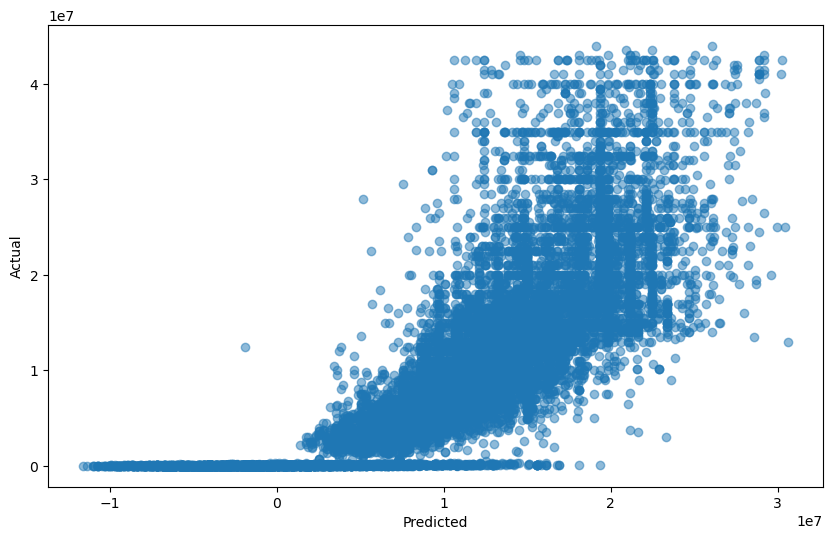

In [189]:
plot_scatter(lr_model)

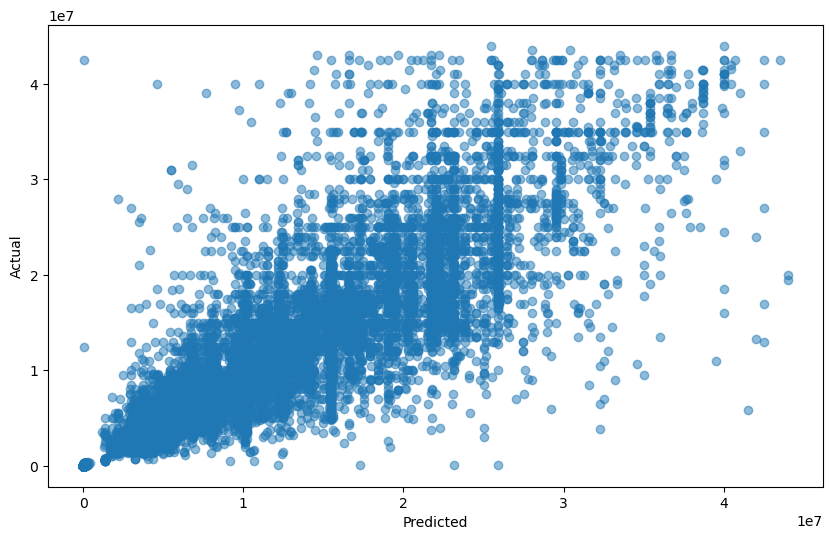

In [190]:
plot_scatter(decision_tree_model)

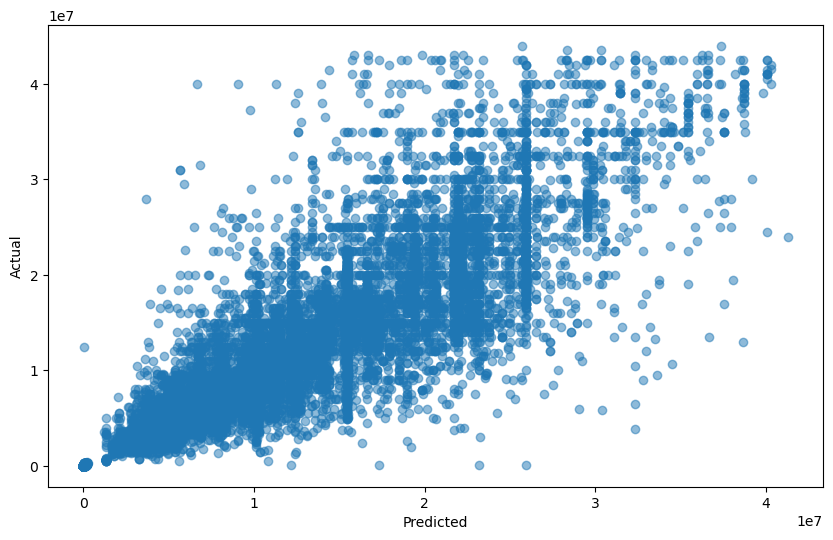

In [191]:
plot_scatter(random_forest_model)

In [192]:
def plot_residual(model) : 
    y_pred = model.predict(x_test)
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color='green')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot (Linear Regression)')
    plt.grid(True)
    plt.show()

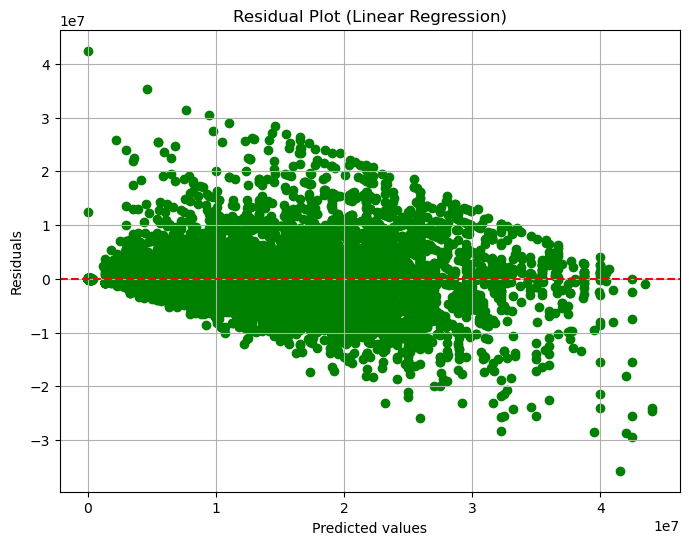

In [193]:
plot_residual(decision_tree_model)

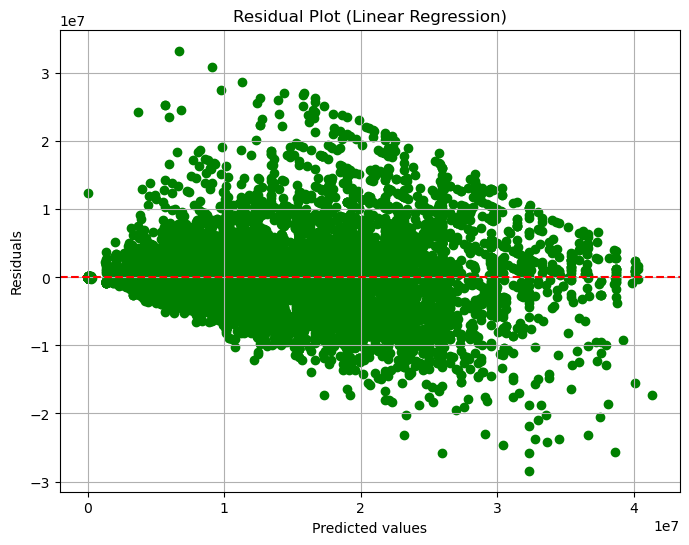

In [194]:
plot_residual(random_forest_model)